In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
legoset = pd.read_csv('legoset.csv')

In [3]:
#getting all columns names
legoset.columns

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'prod_desc', 'prod_id', 'prod_long_desc', 'review_difficulty',
       'set_name', 'star_rating', 'theme_name', 'val_star_rating', 'country',
       'min_age', 'max_age', 'avg_age', 'price_per_piece'],
      dtype='object')

In [4]:
#removing columns which will not be used for price prediction:
df = legoset.drop(columns=['ages','num_reviews', 'play_star_rating', 'prod_desc', 'prod_long_desc', 'review_difficulty', 'set_name', 'star_rating', 'val_star_rating',], axis=1)

In [5]:
df.head()

,list_price,piece_count,prod_id,theme_name,country,min_age,max_age,avg_age,price_per_piece
0,29.99,277.0,75823.0,Angry Birds™,US,6.0,12.0,9.0,0.108267
1,19.99,168.0,75822.0,Angry Birds™,US,6.0,12.0,9.0,0.118988
2,12.99,74.0,75821.0,Angry Birds™,US,6.0,12.0,9.0,0.175541
3,99.99,1032.0,21030.0,Architecture,US,12.0,99.0,55.5,0.096890
4,79.99,744.0,21035.0,Architecture,US,12.0,99.0,55.5,0.107513


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   list_price       9799 non-null   float64
 1   piece_count      9799 non-null   float64
 2   prod_id          9799 non-null   float64
 3   theme_name       9799 non-null   object 
 4   country          9799 non-null   object 
 5   min_age          9799 non-null   float64
 6   max_age          9799 non-null   float64
 7   avg_age          9799 non-null   float64
 8   price_per_piece  9799 non-null   float64
dtypes: float64(7), object(2)
memory usage: 689.1+ KB


# Only US Data

In [7]:
US_df = df[df.country=='US']

In [8]:
US_df

,list_price,piece_count,prod_id,theme_name,country,min_age,max_age,avg_age,price_per_piece
0,29.99,277.0,75823.0,Angry Birds™,US,6.0,12.0,9.0,0.108267
1,19.99,168.0,75822.0,Angry Birds™,US,6.0,12.0,9.0,0.118988
2,12.99,74.0,75821.0,Angry Birds™,US,6.0,12.0,9.0,0.175541
3,99.99,1032.0,21030.0,Architecture,US,12.0,99.0,55.5,0.096890
4,79.99,744.0,21035.0,Architecture,US,12.0,99.0,55.5,0.107513
...,...,...,...,...,...,...,...,...,...
666,9.99,48.0,70628.0,THE LEGO® NINJAGO® MOVIE™,US,6.0,14.0,10.0,0.208125
667,9.99,109.0,70606.0,THE LEGO® NINJAGO® MOVIE™,US,6.0,14.0,10.0,0.091651
668,9.99,102.0,41487.0,BrickHeadz,US,10.0,99.0,54.5,0.097941
669,9.99,89.0,41488.0,BrickHeadz,US,10.0,99.0,54.5,0.112247


In [9]:
US_df = US_df.drop('country', axis=1)

# Dummies for Categorical Data

In [10]:
data = pd.get_dummies(df, columns=['theme_name', 'country' ], drop_first=False)

In [11]:
data.corr()

,list_price,piece_count,prod_id,min_age,max_age,avg_age,price_per_piece,theme_name_Angry Birds™,theme_name_Architecture,theme_name_BOOST,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
list_price,1.000000,0.909581,0.055045,0.572342,0.288287,0.318069,-0.073545,-0.013237,-0.005312,0.064039,...,0.001588,-0.001363,0.004121,0.014506,0.009707,0.033176,0.012936,0.016541,0.009854,-0.060505
piece_count,0.909581,1.000000,0.019097,0.680542,0.361124,0.395672,-0.139014,-0.010965,0.002969,0.014857,...,0.000897,0.000508,0.006155,0.006155,-0.000347,0.006155,0.002250,0.008693,0.005994,-0.028051
prod_id,0.055045,0.019097,1.000000,0.084771,-0.268092,-0.249029,-0.236557,0.023664,-0.160531,-0.054265,...,0.003775,0.002734,-0.007293,-0.007293,0.002366,-0.007293,-0.001359,-0.005289,-0.006691,0.018585
min_age,0.572342,0.680542,0.084771,1.000000,0.597718,0.645321,-0.243208,-0.012408,0.234191,-0.006788,...,0.001254,0.001465,0.001319,0.001319,-0.000571,0.001319,0.001231,0.004241,0.001397,-0.008775
max_age,0.288287,0.361124,-0.268092,0.597718,1.000000,0.998153,-0.128528,-0.013376,0.275647,-0.023819,...,-0.002270,-0.004631,0.001816,0.001816,-0.004078,0.001816,0.000760,0.006415,0.002085,0.001363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
country_NO,0.033176,0.006155,-0.007293,0.001319,0.001816,0.001830,0.014680,-0.005341,0.002243,0.001739,...,-0.047838,-0.047564,-0.046566,-0.046566,-0.047947,1.000000,-0.047122,-0.045608,-0.046510,-0.058507
country_NZ,0.012936,0.002250,-0.001359,0.001231,0.000760,0.000817,0.008332,-0.005405,0.001494,0.001505,...,-0.048409,-0.048132,-0.047122,-0.047122,-0.048519,-0.047122,1.000000,-0.046153,-0.047066,-0.059206
country_PL,0.016541,0.008693,-0.005289,0.004241,0.006415,0.006434,0.002761,-0.005231,0.003555,0.002151,...,-0.046853,-0.046585,-0.045608,-0.045608,-0.046960,-0.045608,-0.046153,1.000000,-0.045553,-0.057303
country_PT,0.009854,0.005994,-0.006691,0.001397,0.002085,0.002093,0.003249,-0.005335,0.002318,-0.009500,...,-0.047780,-0.047506,-0.046510,-0.046510,-0.047889,-0.046510,-0.047066,-0.045553,1.000000,-0.058437


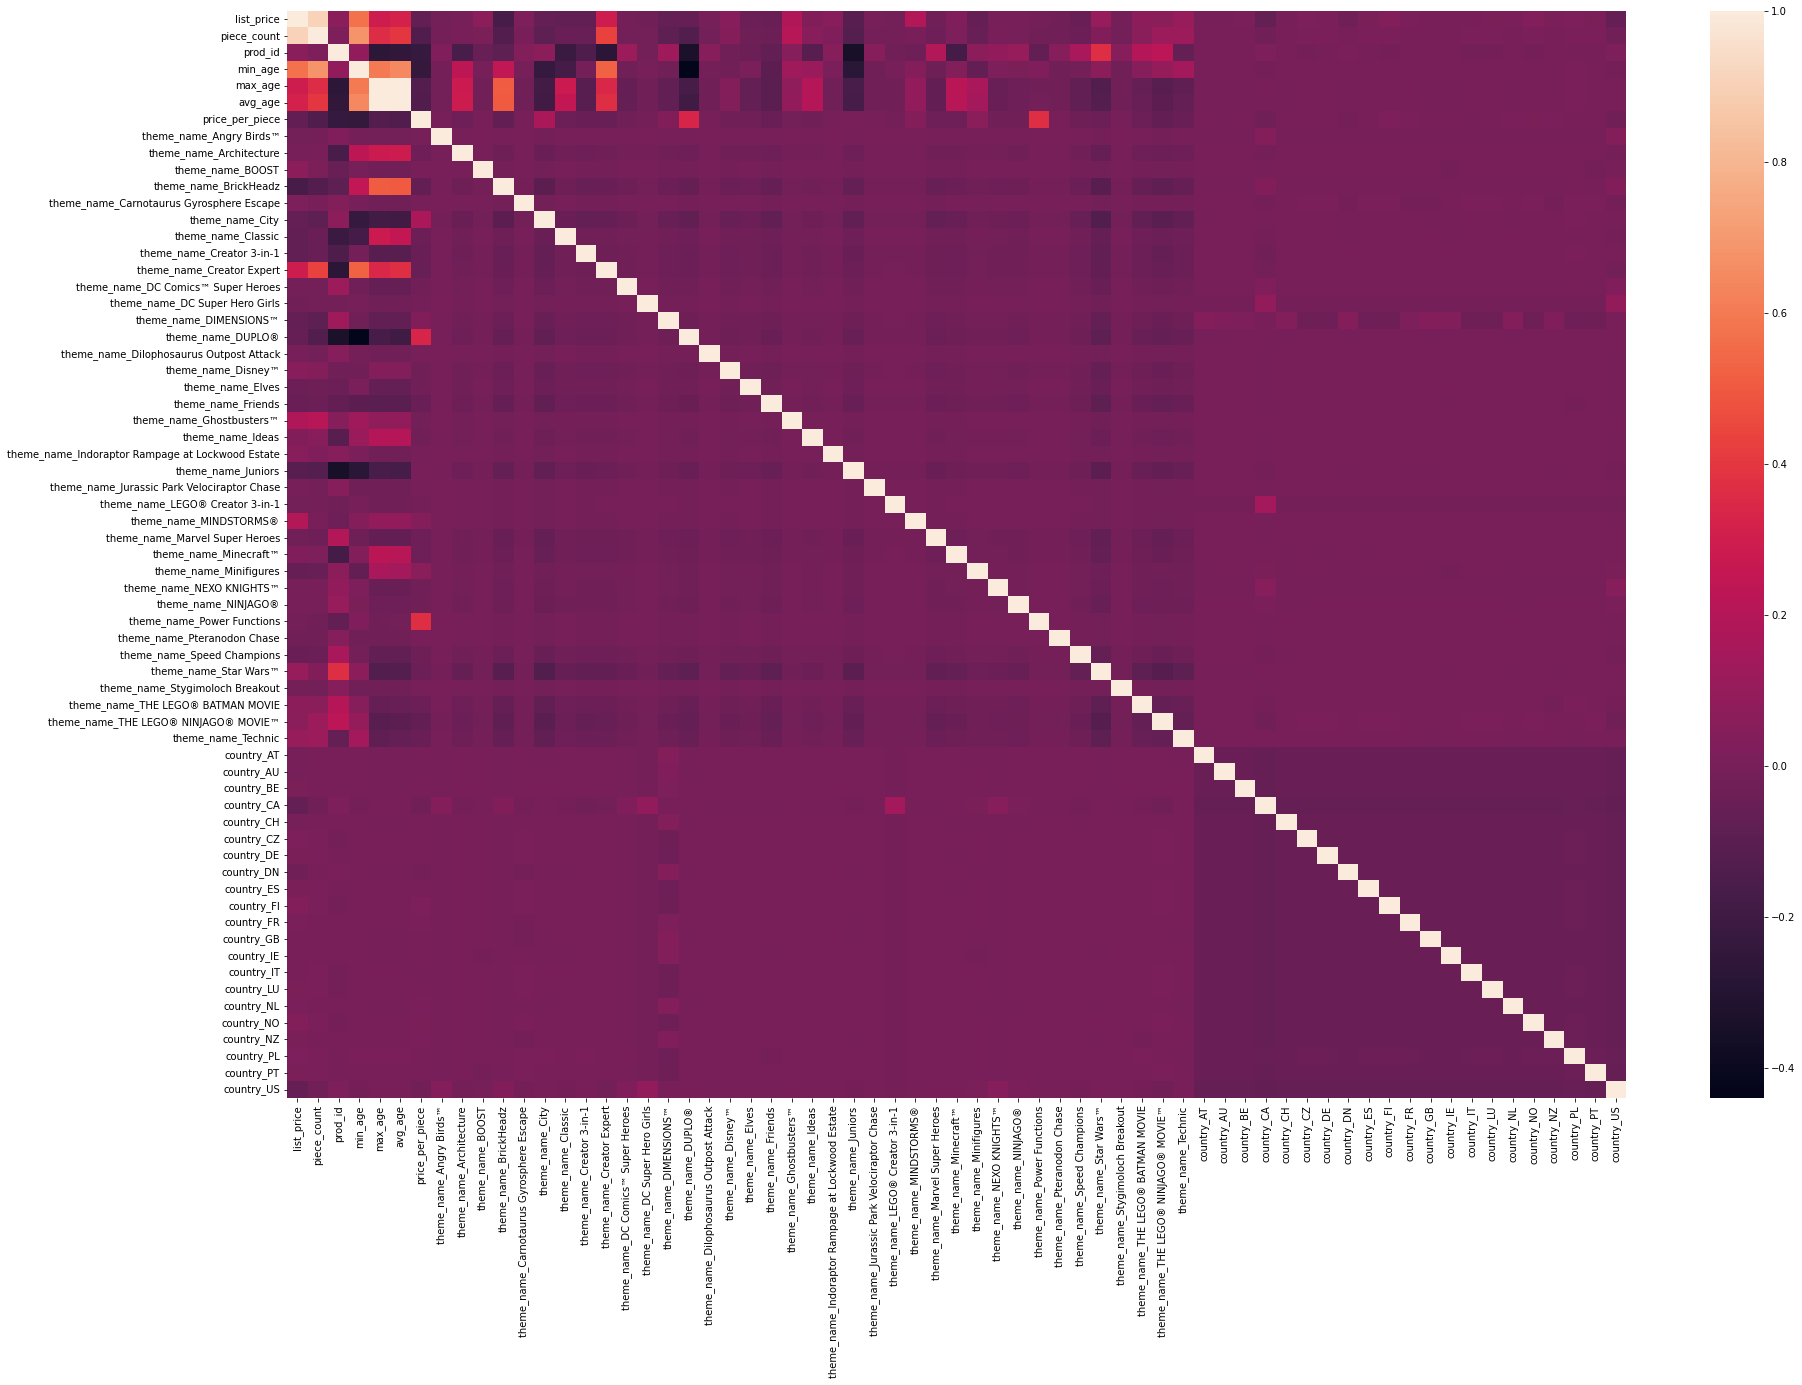

In [12]:
plt.figure(figsize=(30,20))
_ = sns.heatmap(data.corr())

In [13]:
US_data = pd.get_dummies(US_df, columns=['theme_name'], drop_first=False)

In [14]:
US_data.to_csv('US_data.csv', index=False)

In [15]:
US_data.corr()

,list_price,piece_count,prod_id,min_age,max_age,avg_age,price_per_piece,theme_name_Angry Birds™,theme_name_Architecture,theme_name_BOOST,...,theme_name_NEXO KNIGHTS™,theme_name_NINJAGO®,theme_name_Power Functions,theme_name_Pteranodon Chase,theme_name_Speed Champions,theme_name_Star Wars™,theme_name_Stygimoloch Breakout,theme_name_THE LEGO® BATMAN MOVIE,theme_name_THE LEGO® NINJAGO® MOVIE™,theme_name_Technic
list_price,1.000000,0.927291,0.005201,0.535992,0.213918,0.242584,-0.066517,-0.028469,0.009382,0.066384,...,-0.022573,-0.033719,-0.011051,-0.017008,-0.043364,0.079372,-0.011051,0.063726,0.071079,0.145880
piece_count,0.927291,1.000000,-0.003622,0.631458,0.284759,0.317092,-0.119824,-0.026092,0.017422,0.019516,...,-0.013439,-0.020566,-0.023399,-0.017452,-0.030294,0.028624,-0.012529,0.066715,0.143363,0.127770
prod_id,0.005201,-0.003622,1.000000,0.055131,-0.118830,-0.109695,-0.140175,0.041222,-0.098319,-0.034802,...,0.084156,0.070206,-0.043587,0.023868,0.090016,0.237411,0.023869,0.251892,0.117799,-0.060177
min_age,0.535992,0.631458,0.055131,1.000000,0.595665,0.640512,-0.244977,-0.033544,0.212013,-0.005016,...,0.032474,0.000374,0.023628,-0.019337,-0.011222,0.059913,-0.019337,0.051195,0.092481,0.158378
max_age,0.213918,0.284759,-0.118830,0.595665,1.000000,0.998372,-0.109660,-0.036437,0.227767,-0.021006,...,-0.085648,-0.071331,-0.016751,-0.021006,-0.071331,-0.140819,-0.021006,-0.052397,-0.089544,-0.091562
avg_age,0.242584,0.317092,-0.109695,0.640512,0.998372,1.000000,-0.122239,-0.037219,0.232818,-0.020439,...,-0.079580,-0.068171,-0.014337,-0.021456,-0.068994,-0.130378,-0.021456,-0.046460,-0.079043,-0.076293
price_per_piece,-0.066517,-0.119824,-0.140175,-0.244977,-0.109660,-0.122239,1.000000,-0.008538,-0.026519,-0.000294,...,-0.027084,-0.029525,0.237795,-0.002856,-0.033674,-0.040993,-0.004852,-0.036655,-0.055778,-0.040648
theme_name_Angry Birds™,-0.028469,-0.026092,0.041222,-0.033544,-0.036437,-0.037219,-0.008538,1.000000,-0.008243,-0.002589,...,-0.011746,-0.009783,-0.002589,-0.002589,-0.009783,-0.026545,-0.002589,-0.014243,-0.016420,-0.015721
theme_name_Architecture,0.009382,0.017422,-0.098319,0.212013,0.227767,0.232818,-0.026519,-0.008243,1.000000,-0.004752,...,-0.021559,-0.017955,-0.004752,-0.004752,-0.017955,-0.048720,-0.004752,-0.026142,-0.030136,-0.028854
theme_name_BOOST,0.066384,0.019516,-0.034802,-0.005016,-0.021006,-0.020439,-0.000294,-0.002589,-0.004752,1.000000,...,-0.006772,-0.005640,-0.001493,-0.001493,-0.005640,-0.015303,-0.001493,-0.008211,-0.009466,-0.009063


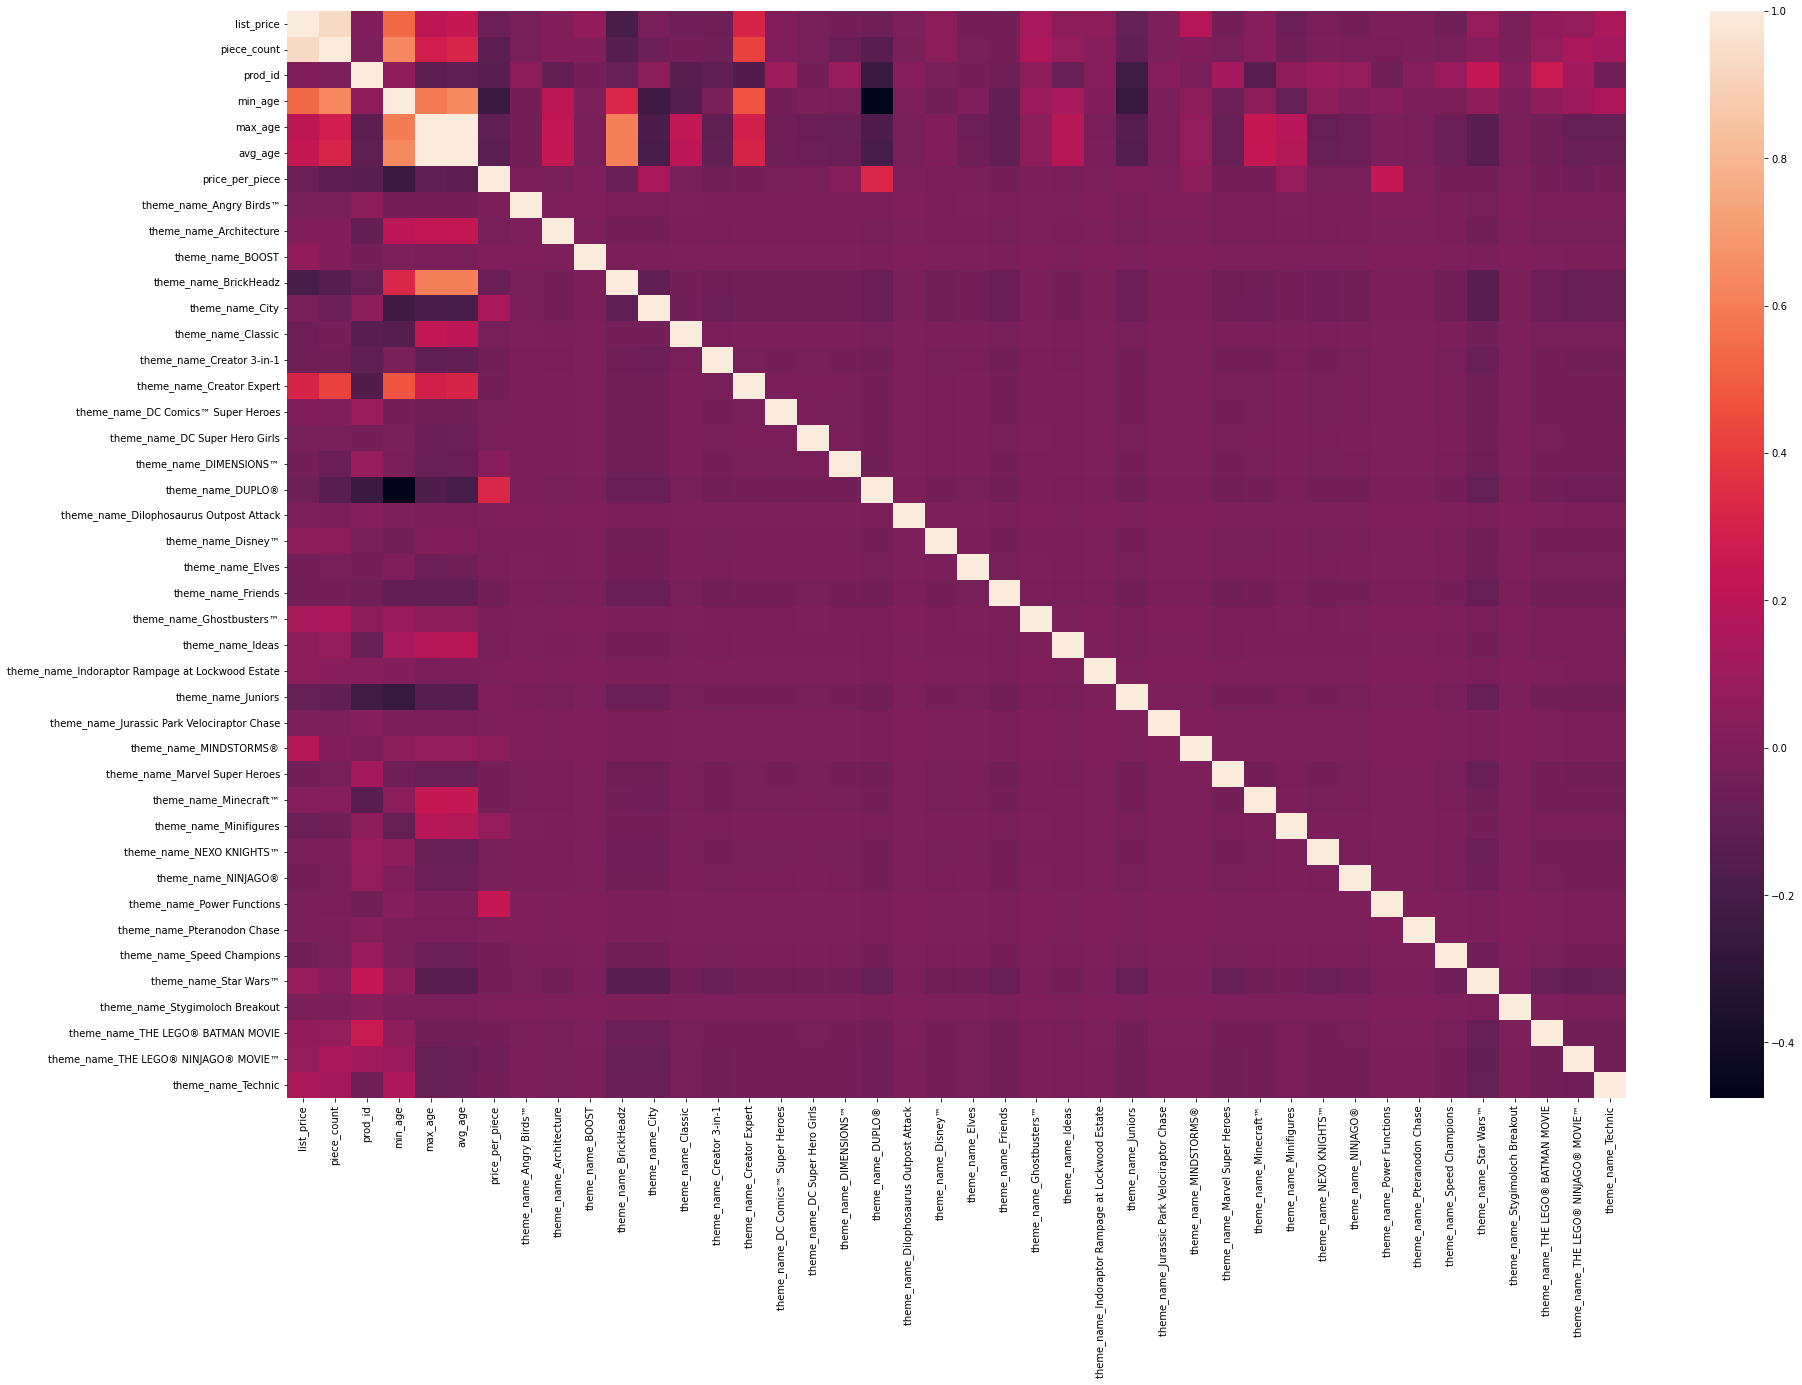

In [16]:
plt.figure(figsize=(30,20))
_ = sns.heatmap(US_data.corr())

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X= data.drop("price_per_piece", axis=1)

y = data['price_per_piece']

In [19]:
X

,list_price,piece_count,prod_id,min_age,max_age,avg_age,theme_name_Angry Birds™,theme_name_Architecture,theme_name_BOOST,theme_name_BrickHeadz,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
0,29.9900,277.0,75823.0,6.0,12.0,9.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,19.9900,168.0,75822.0,6.0,12.0,9.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,12.9900,74.0,75821.0,6.0,12.0,9.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,99.9900,1032.0,21030.0,12.0,99.0,55.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,79.9900,744.0,21035.0,12.0,99.0,55.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,36.5878,341.0,70609.0,7.0,14.0,10.5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9795,24.3878,217.0,70629.0,7.0,14.0,10.5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9796,24.3878,233.0,70607.0,7.0,14.0,10.5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9797,12.1878,48.0,70628.0,6.0,14.0,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
y

0       0.108267
1       0.118988
2       0.175541
3       0.096890
4       0.107513
          ...   
9794    0.107296
9795    0.112386
9796    0.104669
9797    0.253912
9798    0.111815
Name: price_per_piece, Length: 9799, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [22]:
print(len(X_train))
print(len(X_test))

7839
1960


# Modelling

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [26]:
rf = RandomForestRegressor(n_estimators=200,max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict((X_test))

In [27]:
r2 = r2_score(y_test, y_pred_rf)
print(r2)

0.9940122657577862


In [28]:
rf.feature_importances_

array([5.50064463e-02, 2.60581442e-01, 5.55065916e-01, 1.91869385e-02,
       1.06404888e-02, 9.52720121e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.74560593e-06, 0.00000000e+00, 2.33010213e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.90666898e-03, 6.31653143e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.00526813e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.83823770e-03, 0.00000000e+00,
       0.00000000e+00, 2.75551688e-03, 0.00000000e+00, 3.05842928e-07,
       6.74139601e-04, 4.42944218e-07, 5.23410113e-08, 1.67352608e-02,
       0.00000000e+00, 0.00000000e+00, 7.72322639e-04, 0.00000000e+00,
       1.11882423e-06, 1.40333285e-05, 4.44579824e-07, 3.79040496e-06,
       6.85567757e-05, 1.86521047e-07, 2.99103258e-04, 4.95721965e-06,
       8.68274954e-06, 7.85588466e-07, 4.91743384e-05, 2.71747890e-07,
       1.67385635e-04, 9.39526643e-06, 3.89177953e-05, 1.80677526e-05,
      

<BarContainer object of 64 artists>

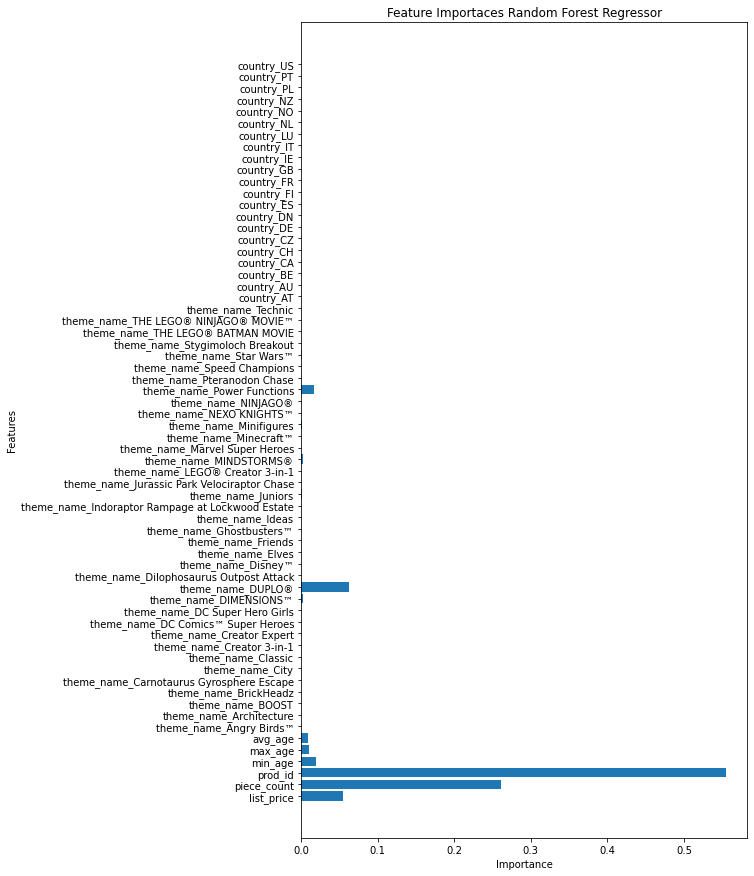

In [29]:
plt.figure(figsize=(8,15))
plt.title('Feature Importaces Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.barh(X_train.columns, rf.feature_importances_)


Text(0.5, 1.0, 'Random Forest Regressor Tested vs Predicted Values')

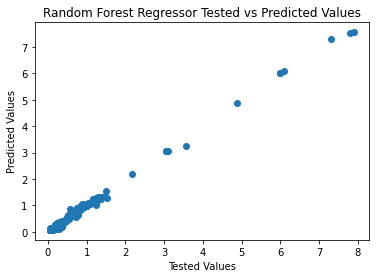

In [32]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Tested Values')
plt.ylabel('Predicted Values')
plt.title("Random Forest Regressor Tested vs Predicted Values")

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normal Distribution Random Forest Regressor')

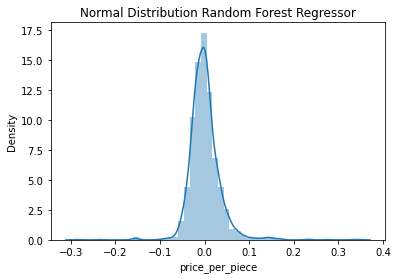

In [33]:
sns.distplot((y_test-y_pred_rf), bins=50);
plt.title('Normal Distribution Random Forest Regressor')